<a href="https://colab.research.google.com/github/asaadkhan21/Machine_Learning_With_Python/blob/main/Lab_11_K_MeansClustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
dataset=pd.read_csv('Mall_Customers.csv')
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
dataset.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [4]:
import sklearn.cluster as cluster
kmeans=cluster.KMeans(n_clusters=5)
kmeans=kmeans.fit(dataset[['Annual Income (k$)','Spending Score (1-100)']])
kmeans.cluster_centers_

array([[86.53846154, 82.12820513],
       [88.2       , 17.11428571],
       [55.2962963 , 49.51851852],
       [25.72727273, 79.36363636],
       [26.30434783, 20.91304348]])

In [5]:
dataset['income_clusters'] = kmeans.labels_
dataset

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),income_clusters
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,0
196,197,Female,45,126,28,1
197,198,Male,32,126,74,0
198,199,Male,32,137,18,1


In [6]:
dataset['income_clusters'].value_counts()

2    81
0    39
1    35
4    23
3    22
Name: income_clusters, dtype: int64

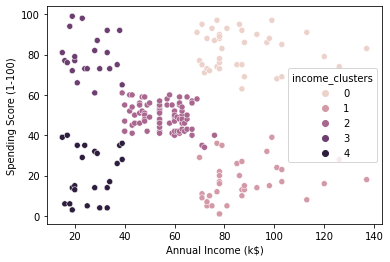

In [7]:
sns.scatterplot(x='Annual Income (k$)',y='Spending Score (1-100)',hue='income_clusters',data=dataset)

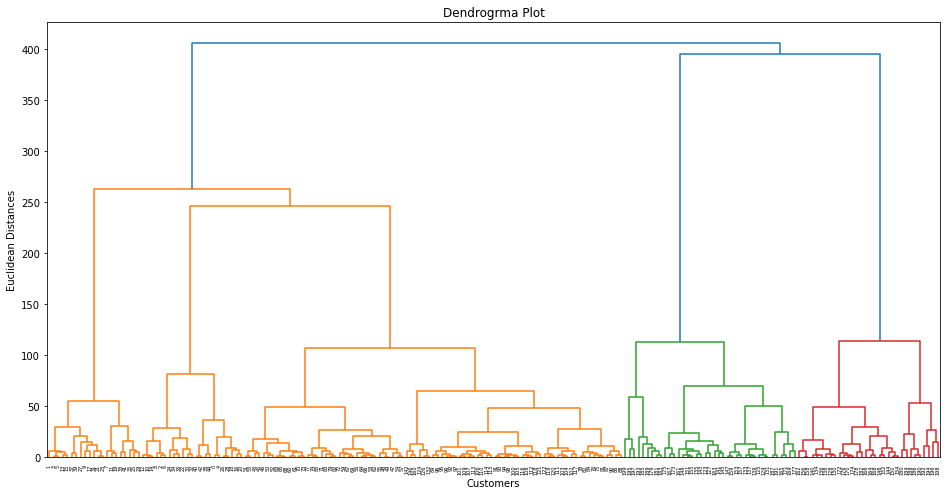

In [8]:
x = dataset.iloc[:, [3, 4]].values 
import  matplotlib.pyplot as plt
plt.figure(figsize = (16,8))
import scipy.cluster.hierarchy as shc  
dendro = shc.dendrogram(shc.linkage(x, method="ward"))  

plt.title("Dendrogrma Plot")  
plt.ylabel("Euclidean Distances")  
plt.xlabel("Customers")  
plt.show()  